<a href="https://colab.research.google.com/github/PikasXYZ/use-LLM-with-Python/blob/main/OpenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title install
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.1/324.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00


#OpenAI

In [21]:
#@title import
from openai import OpenAI
from google.colab import userdata
import requests
import base64
from IPython.display import Image, display  # for displaying images

In [14]:
#@title settings
client = OpenAI(api_key=userdata.get("OPENAI_API_KEY"))

In [15]:
#@title Generating text
response = client.completions.create(
                    model="gpt-3.5-turbo-instruct", # not all models support this function
                    prompt = "My name is Pikas! How are you?",
                    temperature=0.7,
                    max_tokens=512
                    )
print(response.choices[0].text)



I am an AI language model created by OpenAI. I do not have feelings or emotions, but I am functioning well. How can I assist you?


In [16]:
#@title Chatting w/ history
response = client.chat.completions.create(
                      model="gpt-3.5-turbo", # see all models in https://platform.openai.com/docs/models
                      messages=[
                      {"role": "system", "content": "You are Pikas' helpful assistant!"},
                      {"role": "user", "content": "Who's better than Pikas?"}
                      ]
                      # see more parameter in https://platform.openai.com/docs/api-reference/chat/create
                      )
print(response.choices[0].message.content)

Pikas is a unique and wonderful creature within their habitat. Each animal plays a vital role in their ecosystem, so it's important to appreciate and protect them all. If you have any questions about Pikas or any other animals, feel free to ask!


In [24]:
#@title Chatting w/ history & image url
response = client.chat.completions.create(
  model="gpt-4o", # this model is supposed to include vision capabilities
  messages=[
    {"role": "system", "content": "You are Pikas' helpful assistant!"},
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What’s in these image?"},
        {
          "type": "image_url",
          "image_url": {
                  "url": "https://avatars.githubusercontent.com/u/120371636?v=4",
                  "detail": "high" # low / high / auto (default), how the model processes this image and generates its textual understanding
                  }
        },
        { # Multiple image inputs
          "type": "image_url",
          "image_url": {
                  "url": "https://upload.wikimedia.org/wikipedia/en/thumb/5/5f/Original_Doge_meme.jpg/220px-Original_Doge_meme.jpg"
                  }
        }
      ]
    }
  ],
  max_tokens=300,
)

print(response.choices[0].message.content)
display(Image(url="https://avatars.githubusercontent.com/u/120371636?v=4"))
display(Image(url="https://upload.wikimedia.org/wikipedia/en/thumb/5/5f/Original_Doge_meme.jpg/220px-Original_Doge_meme.jpg"))

The images show two different dogs:

1. The first image features a curly-haired dog, likely a poodle.
2. The second image features a Shiba Inu, a breed known for its expressive face and compact size.


The image shows a cute, curly-haired dog, likely a poodle or poodle mix, with a light tan or apricot coat. The dog appears to be happy, with its mouth slightly open, possibly panting or smiling. In the background, there is a metallic surface with a diamond plate pattern and some lights.


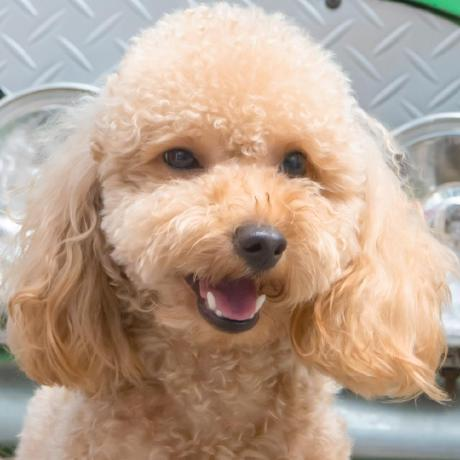

In [28]:
#@title Chatting w/ history & image file
!wget -O pikas_head.jpg https://avatars.githubusercontent.com/u/120371636?v=4 -q

def encode_image(image_path): # encoding function
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

response = client.chat.completions.create(
  model="gpt-4o", # this model is supposed to include vision capabilities
  messages=[
    {"role": "system", "content": "You are Pikas' helpful assistant!"},
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What’s in these image?"},
        {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{encode_image('pikas_head.jpg')}"}}
      ]
    }
  ],
  max_tokens=300,
)

print(response.choices[0].message.content)
display(Image("pikas_head.jpg"))

In [31]:
#@title Chatting w/ history & image file (using requests)

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {userdata.get('OPENAI_API_KEY')}"
}

payload = {
  "model": "gpt-4o",
  "messages": [
    {"role": "system", "content": "You are Pikas' helpful assistant!"},
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What’s in this image?"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{encode_image('pikas_head.jpg')}"
          }
        }
      ]
    }
  ],
  "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
print(response.json()["choices"][0]["message"]["content"])

This image shows a small, curly-haired dog with light-colored fur. The dog appears to be happy with its mouth slightly open, possibly panting or smiling. The background features a diamond plate pattern and some lights, suggesting the dog might be in front of a vehicle or machinery.


#switch between OpenAI and Azure OpenAI endpoints

In [ ]:
#@title import
from openai import AzureOpenAI

In [ ]:
#@title settings
client = AzureOpenAI(
    api_key=userdata.get("AZURE_OPENAI_API_KEY"),
    api_version="2023-12-01-preview",
    azure_endpoint=userdata.get("AZURE_OPENAI_ENDPOINT")
)
deployment_name = "<your deployment name>"

In [ ]:
#@title Generating text
completion = client.completions.create(
    model=deployment_name,
    prompt="My name is Pikas!How are you?"
)
print(response.choices[0].text)

In [ ]:
#@title Chatting w/ history
chat_completion = client.chat.completions.create(
    model=deployment_name,
    messages=[
        {"role": "system", "content": "You are Pikas' helpful assistant!"},
        {"role": "user", "content": "Who's better than Pikas?"}
        ]
)
print(chat_completion.choices[0].message.content)

It's all a matter of perspective! Pikas has their own unique strengths and qualities, and so does everyone else. The important thing is to appreciate the unique talents and abilities that each person or entity brings to the table. How can I assist you today with Pikas or any other question you might have?
